### Why RFM?
- RFM (Recency, Frequency, Monetary) analysis is a marketing model using customer segmentation based on their transaction history.
- This model could be very useful, especially for small and medium-sized enterprises (SMEs) with limited marketing resources, helping them focus on the potentially right customer segments to increase ROI, reduce churn, reduce cost, improve customer relationship, and a lot more.

### How?
- In RFM analysis, customers are scored based on three factors (Recency - how recently, Frequency - how often, Monetary - how much), then labeled based on the combination of RFM scores.

### Reference:
- https://www.putler.com/rfm-analysis

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

### Import data

In [2]:
# Orders table
order = pd.read_excel(r"Dataset.xlsx", sheet_name='Orders', dtype={'CustomerID': str,'InvoiceNo': str})
order


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850
...,...,...,...,...,...,...,...
354340,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804
354341,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113
354342,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113
354343,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113


In [3]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354345 entries, 0 to 354344
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 18.9+ MB


In [4]:
# Segmentations table
segment = pd.read_excel(r"Dataset.xlsx", sheet_name='Segmentation')
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


### Calculate Recency, Frequency, Monetary

In [5]:
# calculate total sales of each order
order['Sales'] = order['UnitPrice'] * order['Quantity']
groupby_order = order.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID'], as_index=False)['Sales'].sum()
groupby_order

,InvoiceNo,InvoiceDate,CustomerID,Sales
0,536365,2010-12-01 08:26:00,17850,139.12
1,536366,2010-12-01 08:28:00,17850,22.20
2,536367,2010-12-01 08:34:00,13047,278.73
3,536368,2010-12-01 08:34:00,13047,70.05
4,536369,2010-12-01 08:35:00,13047,17.85
...,...,...,...,...
16671,581582,2011-12-09 12:21:00,17581,29.88
16672,581583,2011-12-09 12:23:00,13777,124.60
16673,581584,2011-12-09 12:25:00,13777,140.64
16674,581585,2011-12-09 12:31:00,15804,329.05


In [6]:
# Assume "2011-12-31" is day used to calculate Recency
day_r = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d')

In [7]:
# Calculate r value, f value, and m value

rfm = groupby_order.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': 'count', 'Sales': 'sum'}).reset_index()
rfm.columns = ['CustomerID', 'LastOrderDate', 'Frequency', 'Monetary']
rfm['Recency'] = (day_r - rfm['LastOrderDate']).dt.days
rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,346,1,77183.60
1,12747,23,11,4196.01
2,12748,21,211,33719.73
3,12749,24,5,4090.88
4,12820,24,4,942.34
...,...,...,...,...
3916,18280,298,1,180.60
3917,18281,201,1,80.82
3918,18282,28,2,178.05
3919,18283,24,16,2094.88


In [8]:
# Calculate r score, f score, and m score
def R_score(x,d,s):
    if x <= d[s].quantile(0.2):
        return 5
    elif x <= d[s].quantile(0.4):
        return 4
    elif x <= d[s].quantile(0.6):
        return 3
    elif x <= d[s].quantile(0.8):
        return 2
    else:
        return 1

def FM_score(x,d,s):
    if x <= d[s].quantile(0.2):
        return 1
    elif x <= d[s].quantile(0.4):
        return 2
    elif x <= d[s].quantile(0.6):
        return 3
    elif x <= d[s].quantile(0.8):
        return 4
    else:
        return 5
    
rfm['R Score'] = rfm.apply(lambda row: R_score(row['Recency'], rfm, 'Recency'), axis=1)
rfm['F Score'] = rfm.apply(lambda row: FM_score(row['Frequency'], rfm, 'Frequency'), axis=1)
rfm['M Score'] = rfm.apply(lambda row: FM_score(row['Monetary'], rfm, 'Monetary'), axis=1)

In [9]:
rfm['RFM Score'] = rfm['R Score'].astype(str) + rfm['F Score'].astype(str) + rfm['M Score'].astype(str)
rfm['RFM Score'] = rfm['RFM Score'].astype(int)
rfm

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score
0,12346,346,1,77183.60,1,1,5,115
1,12747,23,11,4196.01,5,5,5,555
2,12748,21,211,33719.73,5,5,5,555
3,12749,24,5,4090.88,5,4,5,545
4,12820,24,4,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3916,18280,298,1,180.60,1,1,1,111
3917,18281,201,1,80.82,1,1,1,111
3918,18282,28,2,178.05,5,2,1,521
3919,18283,24,16,2094.88,5,5,5,555


In [10]:
# convert comma-separated string to a list of RFM scores

segment['RFM Score'] = segment['RFM Score'].str.split(',')
segment = segment.explode('RFM Score').reset_index(drop=True)
segment['RFM Score'] = segment['RFM Score'].astype(int)
segment.sort_values(by='RFM Score')
segment.head(10)

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [11]:
joined = rfm.merge(segment, how='left', on='RFM Score')
joined

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score,Segment
0,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12747,23,11,4196.01,5,5,5,555,Champions
2,12748,21,211,33719.73,5,5,5,555,Champions
3,12749,24,5,4090.88,5,4,5,545,Champions
4,12820,24,4,942.34,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3916,18280,298,1,180.60,1,1,1,111,Lost customers
3917,18281,201,1,80.82,1,1,1,111,Lost customers
3918,18282,28,2,178.05,5,2,1,521,Promising
3919,18283,24,16,2094.88,5,5,5,555,Champions


### Visualization

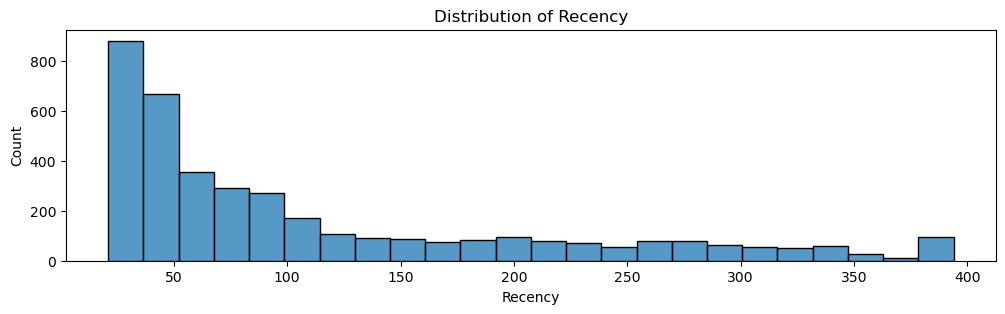

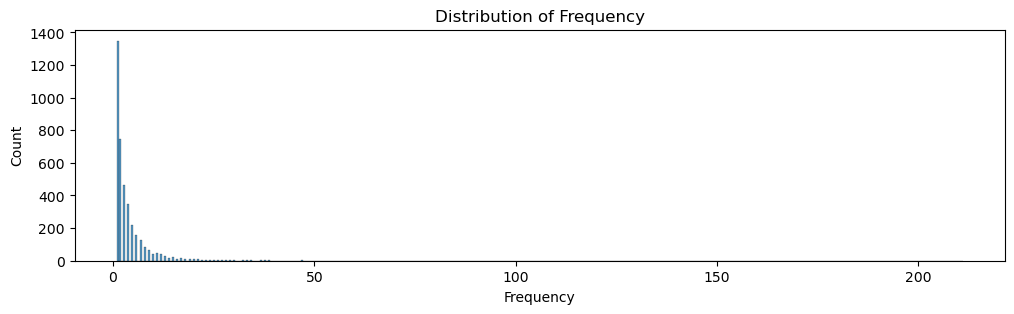

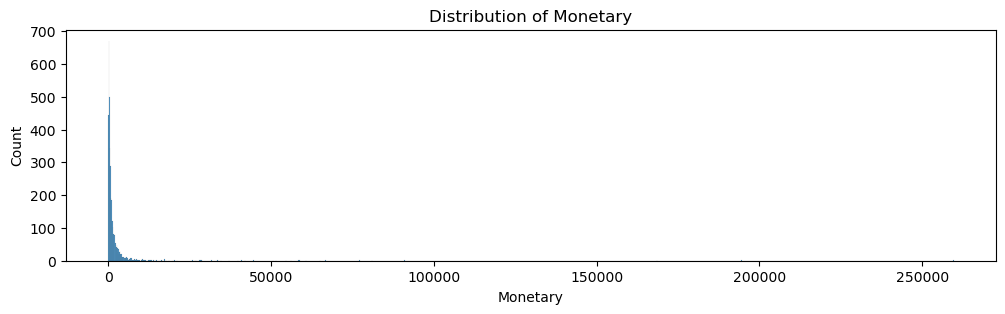

In [12]:
# show distribution of each variable of the model

colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [13]:
grp = joined.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean',
                                     'Frequency': 'mean'}).reset_index()
grp.columns = ['Segment', 'CustomerCount', 'TotalMonetary', 'AvgRecency', 'AvgFrequency']
grp.sort_values(by='CustomerCount', ascending=False, inplace=True)
grp

,Segment,CustomerCount,TotalMonetary,AvgRecency,AvgFrequency
3,Champions,724,4389847.630,31.273481,12.270718
4,Hibernating customers,589,225520.612,156.925297,1.747029
5,Lost customers,514,109648.670,296.359922,1.060311
6,Loyal,363,847617.220,57.606061,5.707989
8,New Customers,360,76038.990,50.822222,1.169444
1,At Risk,315,596119.641,156.361905,4.161905
9,Potential Loyalist,293,178514.510,52.276451,2.730375
7,Need Attention,231,275286.701,53.809524,3.320346
10,Promising,214,329753.980,42.271028,1.607477
0,About To Sleep,209,78533.700,100.100478,1.363636


In [14]:
grp['CountShare'] = grp['CustomerCount'] / grp['CustomerCount'].sum()
grp['MonetaryShare'] = grp['TotalMonetary'] / grp['TotalMonetary'].sum()
grp

,Segment,CustomerCount,TotalMonetary,AvgRecency,AvgFrequency,CountShare,MonetaryShare
3,Champions,724,4389847.630,31.273481,12.270718,0.184647,0.600659
4,Hibernating customers,589,225520.612,156.925297,1.747029,0.150217,0.030858
5,Lost customers,514,109648.670,296.359922,1.060311,0.131089,0.015003
6,Loyal,363,847617.220,57.606061,5.707989,0.092578,0.115979
8,New Customers,360,76038.990,50.822222,1.169444,0.091813,0.010404
1,At Risk,315,596119.641,156.361905,4.161905,0.080337,0.081566
9,Potential Loyalist,293,178514.510,52.276451,2.730375,0.074726,0.024426
7,Need Attention,231,275286.701,53.809524,3.320346,0.058914,0.037667
10,Promising,214,329753.980,42.271028,1.607477,0.054578,0.045120
0,About To Sleep,209,78533.700,100.100478,1.363636,0.053303,0.010746


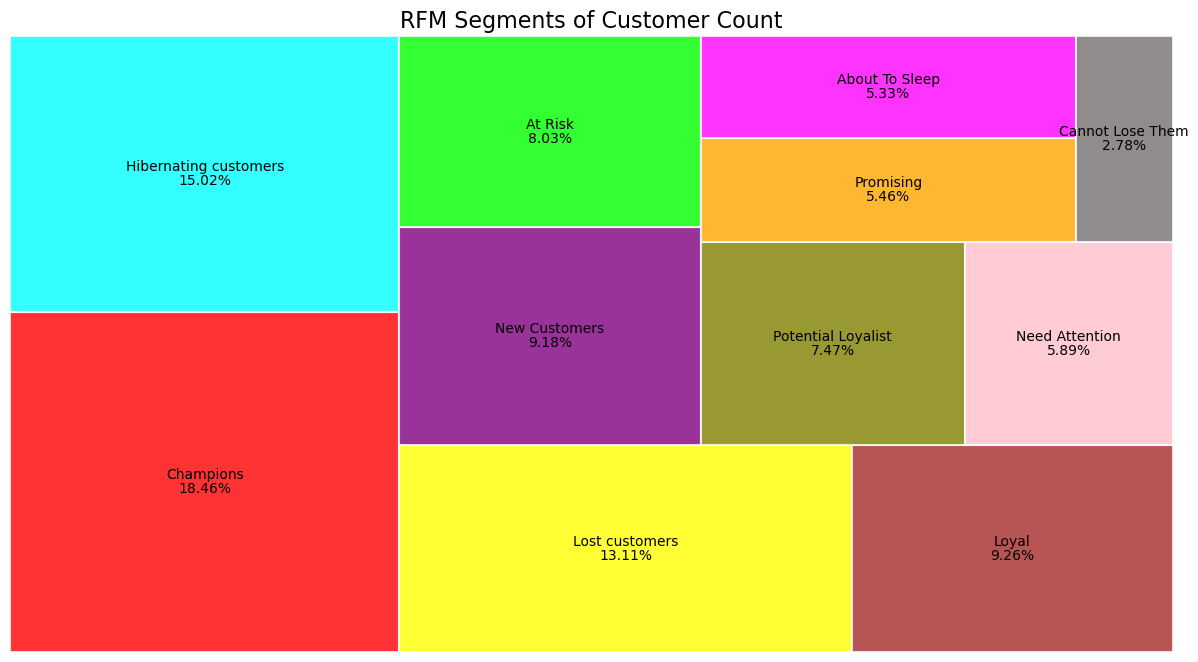

In [15]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['CustomerCount'], 
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['CountShare']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

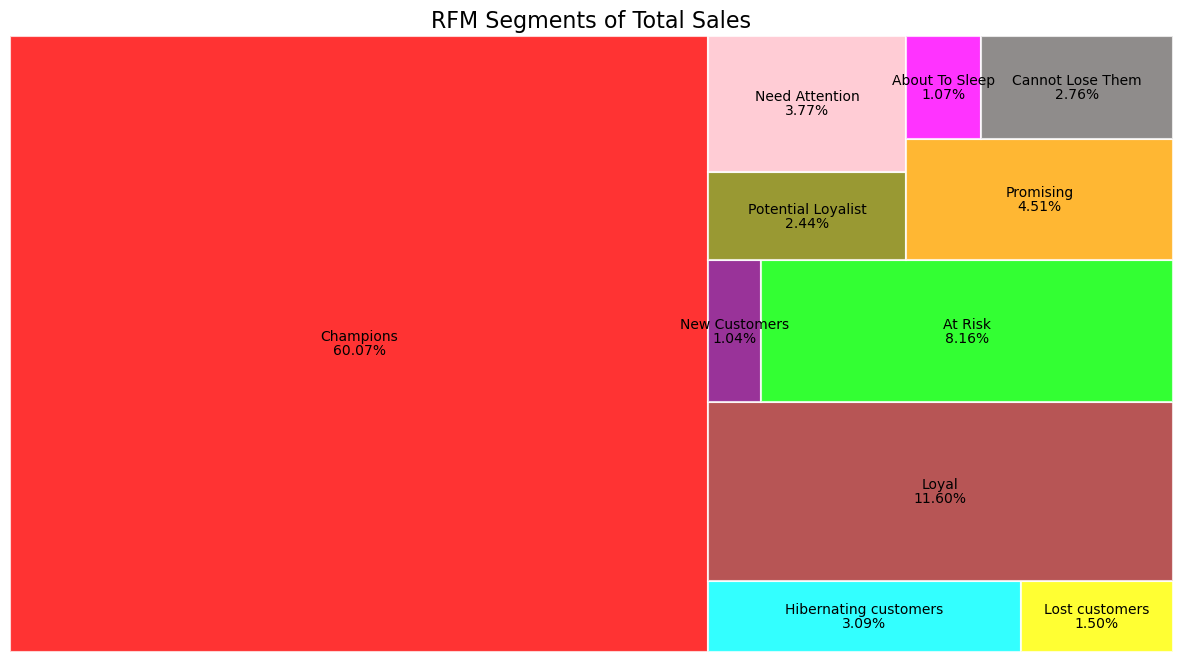

In [16]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['MonetaryShare'], 
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['MonetaryShare']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()

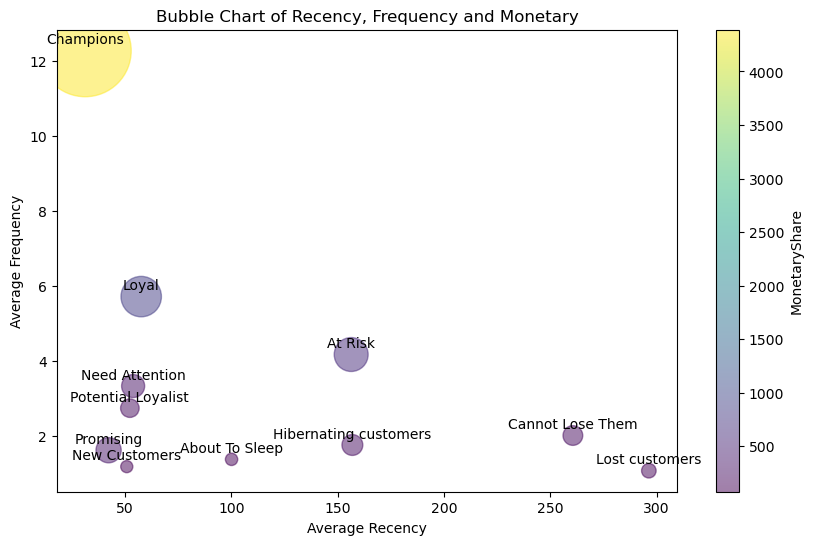

In [17]:

plt.figure(figsize=(10, 6))

plt.scatter(grp['AvgRecency'], grp['AvgFrequency'], s=grp['TotalMonetary']/1000, alpha=0.5, c=grp['TotalMonetary']/1000, cmap='viridis')

plt.xlabel('Average Recency')
plt.ylabel('Average Frequency')
plt.title('Bubble Chart of Recency, Frequency and Monetary')

plt.colorbar(label='MonetaryShare')

for i in range(grp.shape[0]):
    plt.annotate(
        grp['Segment'].iloc[i], 
        (grp['AvgRecency'].iloc[i], grp['AvgFrequency'].iloc[i]),
        textcoords="offset points",
        xytext=(0,5),
        ha='center'
    )

plt.show()